In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
pio.renderers.default = 'iframe'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X 

In [4]:
GD_model = SGDRegressor(max_iter=1, eta0=0.0001, warm_start=True)

In [5]:
out = []

for i in range(100):
    GD_model.fit(X, y) 
    out.append([
                i, GD_model.coef_[0], 
                GD_model.intercept_[0],
                mean_squared_error(y, GD_model.predict(X))
                ])
    
    df = pd.DataFrame(out, columns=["itteration", "m", "b", "MSE"])
    _out = out[-1]
    print(f"Itteration Number: {_out[0]}, Param (1): {_out[1]}, Param (2): {_out[2]}, MSE: {_out[3]}")

Itteration Number: 0, Param (1): 0.1800330279885078, Param (2): 0.1601715379623294, MSE: 46.18070073494381
Itteration Number: 1, Param (1): 0.3496475688009273, Param (2): 0.3122872301278949, MSE: 41.777103180261285
Itteration Number: 2, Param (1): 0.5109679416401618, Param (2): 0.45692947559935004, MSE: 37.79462711489065
Itteration Number: 3, Param (1): 0.6640185044112423, Param (2): 0.5946922205356524, MSE: 34.19525726240643
Itteration Number: 4, Param (1): 0.8083783257235281, Param (2): 0.7255561886138983, MSE: 30.955941565947636
Itteration Number: 5, Param (1): 0.947191459116006, Param (2): 0.850579491214458, MSE: 28.002115949628593
Itteration Number: 6, Param (1): 1.0792067171236637, Param (2): 0.9696261474879008, MSE: 25.32955995087875
Itteration Number: 7, Param (1): 1.2048411037262872, Param (2): 1.082937058761696, MSE: 22.9111283254837
Itteration Number: 8, Param (1): 1.3235841372452606, Param (2): 1.1907370395904822, MSE: 20.7312617466774
Itteration Number: 9, Param (1): 1.436

In [6]:
df

,itteration,m,b,MSE
0,0,0.180033,0.160172,46.180701
1,1,0.349648,0.312287,41.777103
2,2,0.510968,0.456929,37.794627
3,3,0.664019,0.594692,34.195257
4,4,0.808378,0.725556,30.955942
...,...,...,...,...
95,95,3.462053,3.406132,0.089506
96,96,3.461785,3.409421,0.088579
97,97,3.461340,3.412570,0.087703
98,98,3.460891,3.415721,0.086840


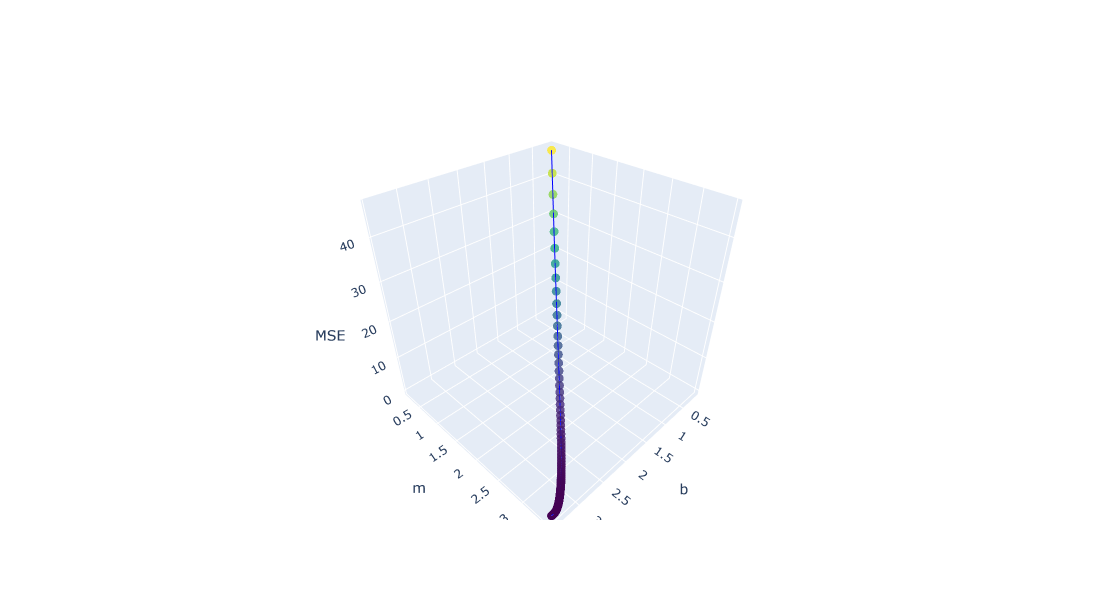

In [7]:
init_notebook_mode(connected=True)

trace = go.Scatter3d(
    x=df['b'],
    y=df['m'],
    z=df['MSE'],
    mode='lines+markers',
    marker=dict(size=5, color=df['MSE'], colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
)

layout = go.Layout(
    title='',
    scene=dict(
        xaxis=dict(title='b'),
        yaxis=dict(title='m'),
        zaxis=dict(title='MSE')
    ),
    width=800,
    height=600
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)